In [74]:
from duneanalytics import DuneAnalytics
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [75]:
# load env variables for dune
load_dotenv()

True

In [76]:
# initialize client
dune = DuneAnalytics(os.getenv('DUNE_USER'), os.getenv('DUNE_PASSWORD'))

# try to login
dune.login()

# fetch token
dune.fetch_auth_token()

In [77]:
result_id = dune.query_result_id(query_id=1282741)
# fetch query result
data = dune.query_result(result_id)
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df = pd.DataFrame(data)

In [78]:
result_id = dune.query_result_id(query_id=1286404)
# fetch query result
data = dune.query_result(result_id)
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df2 = pd.DataFrame(data)

In [79]:
result_id = dune.query_result_id(query_id=1286480)
# fetch query result
data = dune.query_result(result_id)
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df3 = pd.DataFrame(data)

In [80]:
result_id = dune.query_result_id(query_id=1286407)
# fetch query result
data = dune.query_result(result_id)
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df4 = pd.DataFrame(data)

In [81]:
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.sort_values(by=['block_number'])

In [98]:
df = df.sort_values(by=['block_number'])

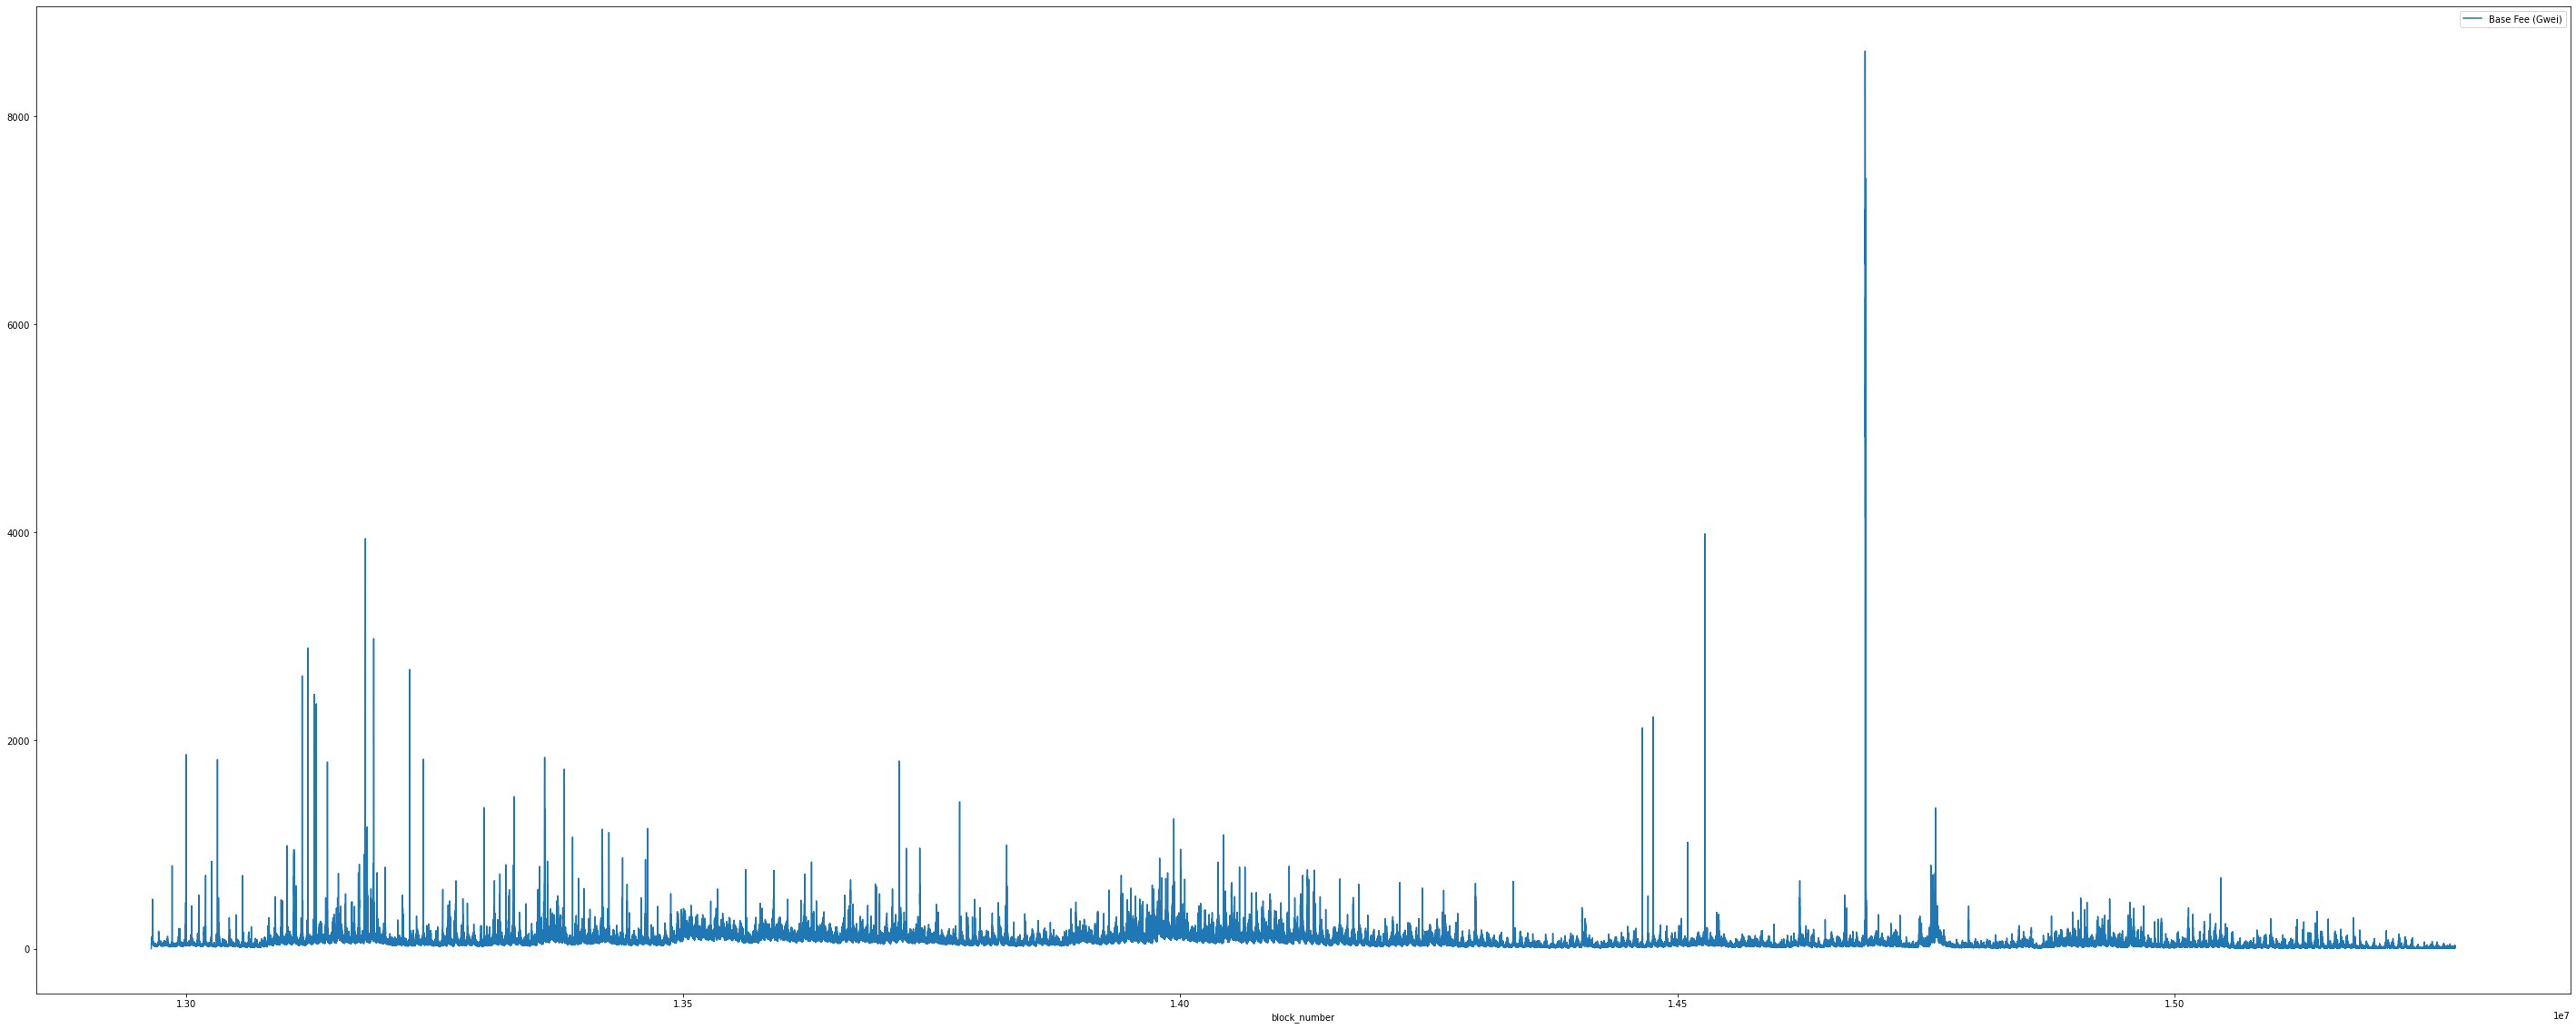

In [109]:
lines = df.plot.line(x='block_number', y=['Base Fee (Gwei)'], figsize=(50, 20))
lines.ticklabel_format(useOffset=False, style='plain')

In [101]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))['Base Fee (Gwei)']

count    2262923.00000
mean          74.16312
std          122.06981
min            1.00000
25%           33.25956
50%           58.06811
75%           96.34950
max         8629.05117
Name: Base Fee (Gwei), dtype: object

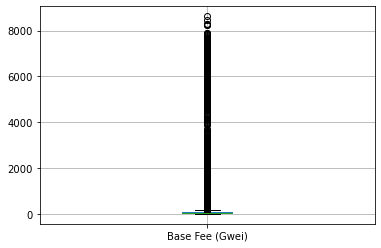

In [12]:
boxplot = df.boxplot(column=['Base Fee (Gwei)'])  

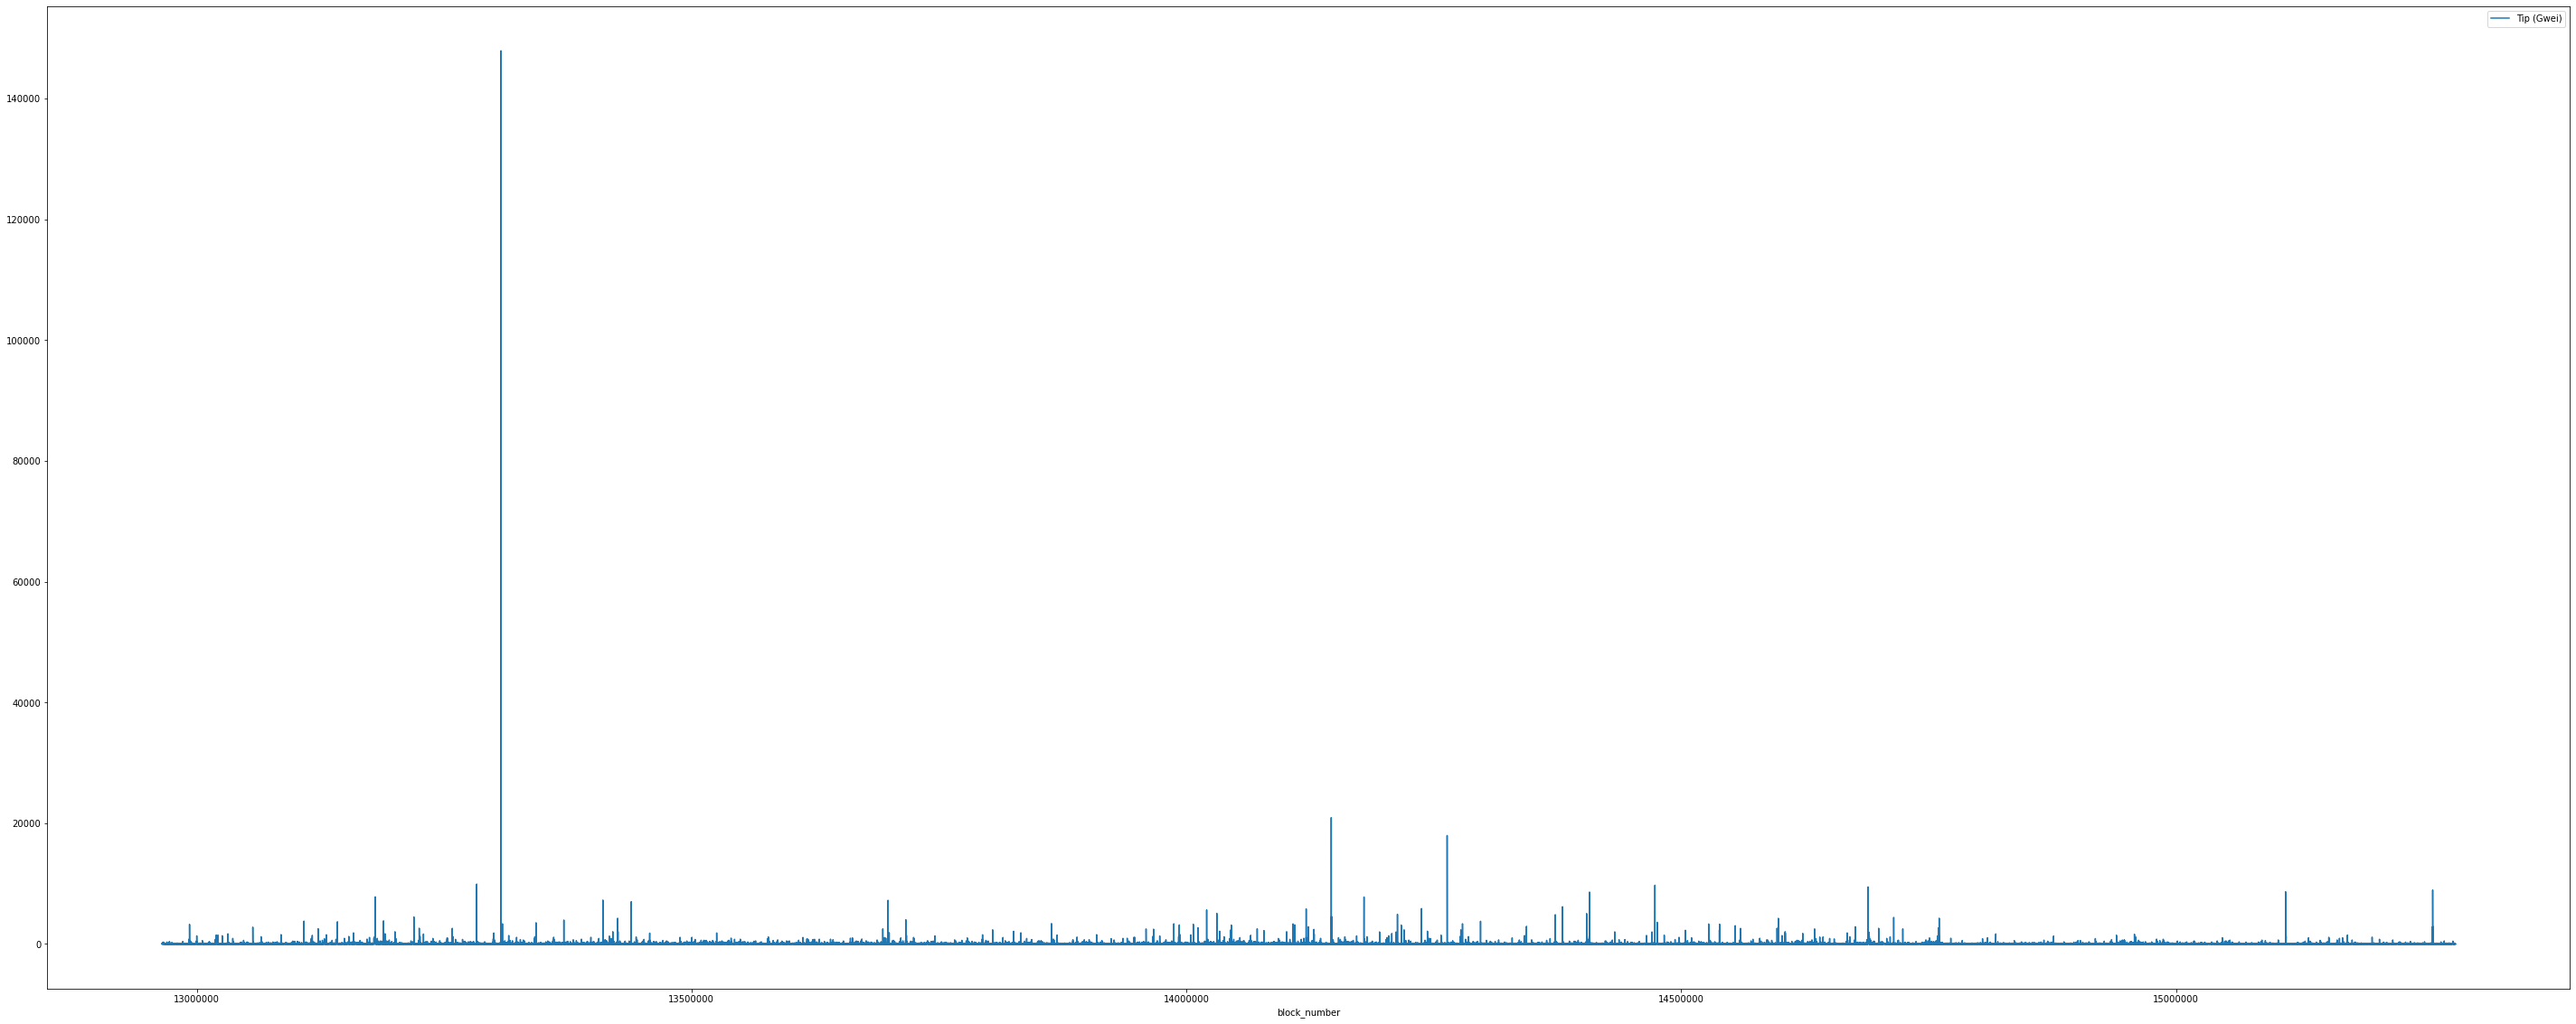

In [108]:
lines = df.plot.line(x='block_number', y=['Tip (Gwei)'], figsize=(50, 20))
lines.ticklabel_format(useOffset=False, style='plain')

In [117]:
df.loc[df['Tip (Gwei)'] >147907.96991]

,Base Fee (Gwei),Block Base Fees (ETH),Block Tips (ETH),Tip (Gwei),block_number
645229,58.907049,1.696361,7676.795454,147907.969914,13307440


In [116]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))['Tip (Gwei)']

count    2262923.00000
mean          12.65619
std          122.72035
min            0.00000
25%            4.15004
50%            7.24928
75%           12.88182
max       147907.96991
Name: Tip (Gwei), dtype: object